In [31]:
import pandas as pd
import numpy as np


In [32]:
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol',
    'fbs', 'restecg', 'thalach', 'exang',
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]

In [33]:
df = pd.read_csv(r"D:\My Projects\Heart Disease - sprints project\heart+disease\processed.cleveland.data", names=column_names)

In [34]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [36]:
df.shape

(303, 14)

In [37]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [38]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [39]:
print("ca unique values:", df['ca'].unique())
print("thal unique values:", df['thal'].unique())


ca unique values: ['0.0' '3.0' '2.0' '1.0' '?']
thal unique values: ['6.0' '3.0' '7.0' '?']


In [40]:
# Replace '?' with NaN
df['ca'] = df['ca'].replace('?', np.nan)
df['thal'] = df['thal'].replace('?', np.nan)

# Convert columns to float
df['ca'] = df['ca'].astype(float)
df['thal'] = df['thal'].astype(float)

# Check how many missing values are in each column
print(df[['ca', 'thal']].isnull().sum())


ca      4
thal    2
dtype: int64


In [41]:
# Drop rows with missing values in 'ca' or 'thal' columns
df = df.dropna(subset=['ca', 'thal'])

# Reset the index after dropping rows
df = df.reset_index(drop=True)

# Confirm no missing values remain
print(df[['ca', 'thal']].isnull().sum())


ca      0
thal    0
dtype: int64


In [42]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

In [43]:
df['target'].value_counts()


target
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

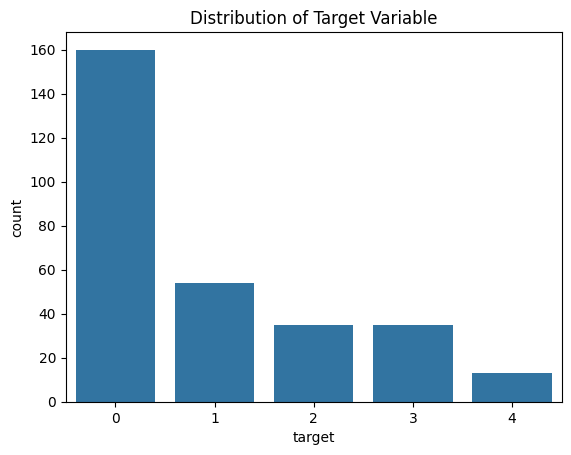

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title("Distribution of Target Variable")
plt.show()


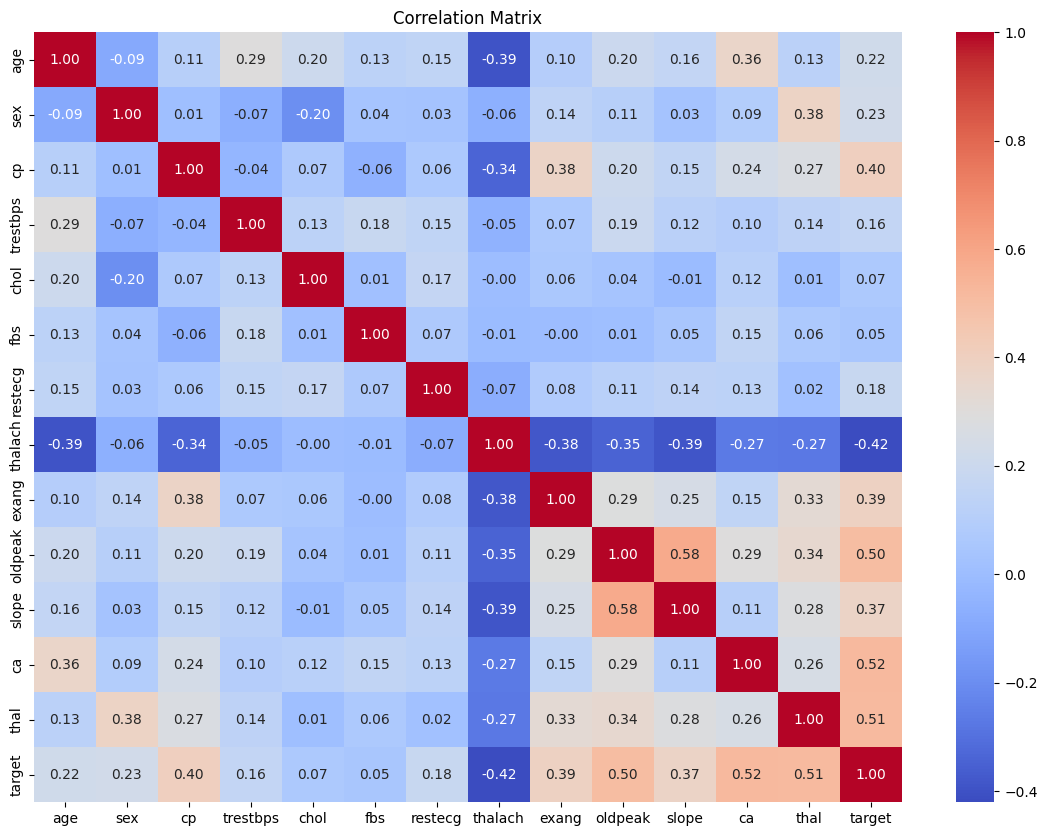

In [45]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_28804\2819704237.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='thalach', data=df, palette='Set2')


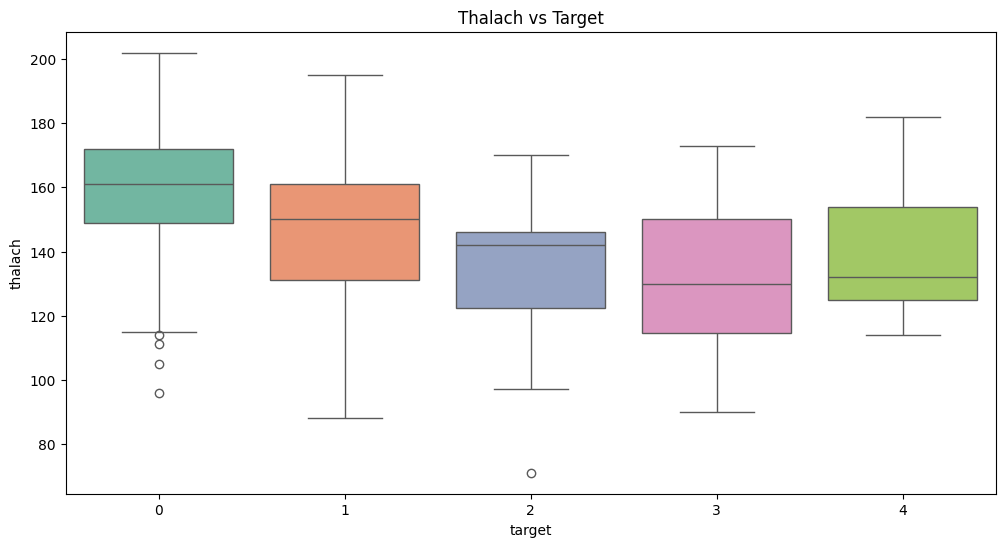

C:\Users\HP\AppData\Local\Temp\ipykernel_28804\2819704237.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='oldpeak', data=df, palette='Set3')


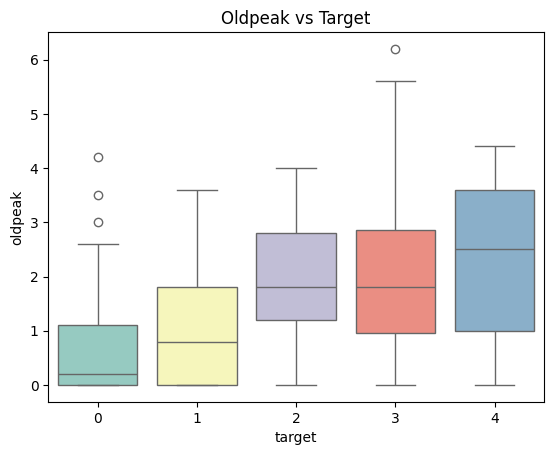

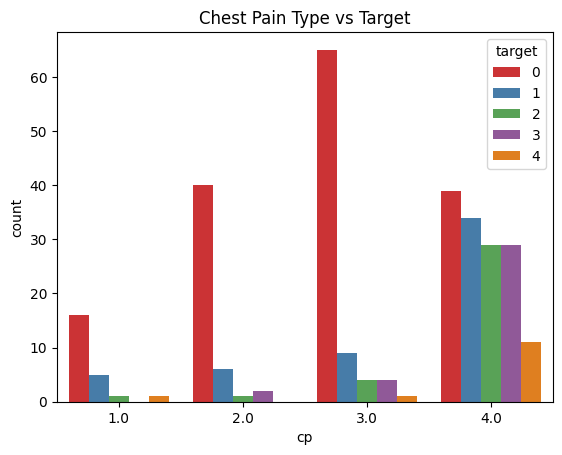

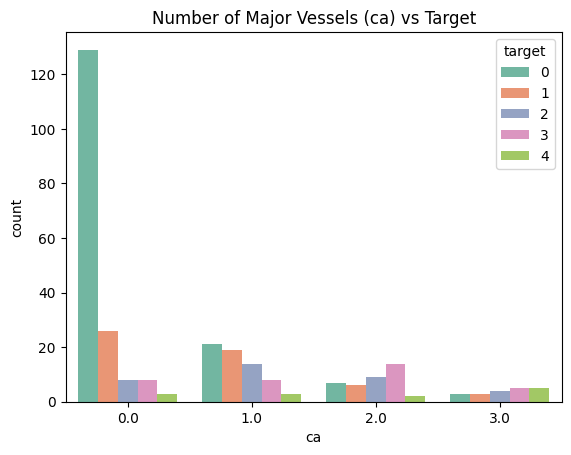

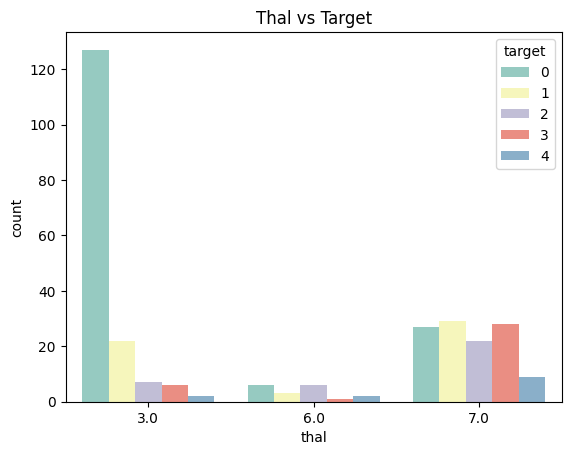

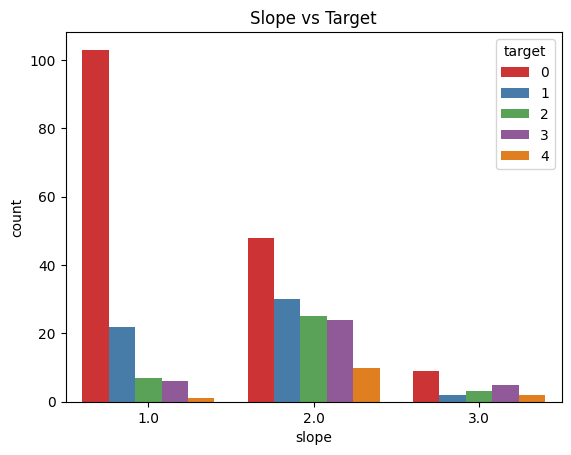

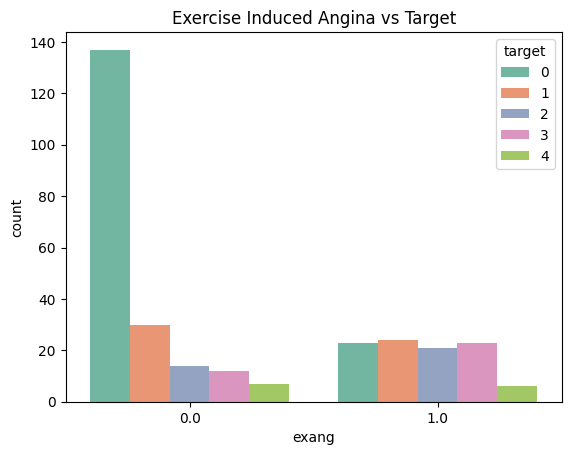

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 1. thalach vs target
sns.boxplot(x='target', y='thalach', data=df, palette='Set2')
plt.title('Thalach vs Target')
plt.show()

# 2. oldpeak vs target
sns.boxplot(x='target', y='oldpeak', data=df, palette='Set3')
plt.title('Oldpeak vs Target')
plt.show()

# 3. cp vs target
sns.countplot(x='cp', hue='target', data=df, palette='Set1')
plt.title('Chest Pain Type vs Target')
plt.show()

# 4. ca vs target
sns.countplot(x='ca', hue='target', data=df, palette='Set2')
plt.title('Number of Major Vessels (ca) vs Target')
plt.show()

# 5. thal vs target
sns.countplot(x='thal', hue='target', data=df, palette='Set3')
plt.title('Thal vs Target')
plt.show()

# 6. slope vs target
sns.countplot(x='slope', hue='target', data=df, palette='Set1')
plt.title('Slope vs Target')
plt.show()

# 7. exang vs target
sns.countplot(x='exang', hue='target', data=df, palette='Set2')
plt.title('Exercise Induced Angina vs Target')
plt.show()


In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [48]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [49]:
# Apply PCA (keep all components initially)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


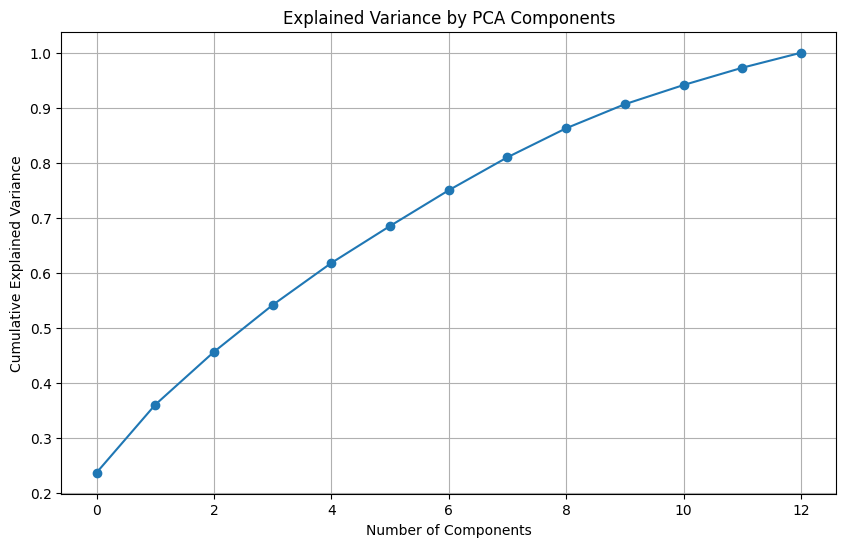

In [50]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


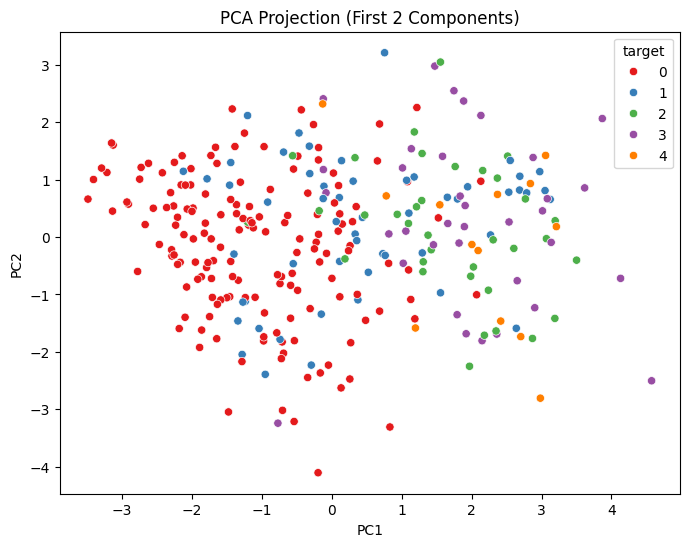

In [51]:
# Create a DataFrame with first two principal components
pca_df = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['target'] = y.values

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set1')
plt.title('PCA Projection (First 2 Components)')
plt.show()


In [52]:
# Find how many components explain at least 95% of the variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components explaining 95% variance: {n_components_95}')


Number of components explaining 95% variance: 12


In [53]:
# Apply PCA again using only the top 12 components
pca_12 = PCA(n_components=12)
X_pca_12 = pca_12.fit_transform(X_scaled)

# Confirm the shape
print("Shape after PCA:", X_pca_12.shape)


Shape after PCA: (297, 12)


In [54]:
# Create a DataFrame with the 12 principal components
pca_columns = [f'PC{i+1}' for i in range(12)]
pca_df_12 = pd.DataFrame(X_pca_12, columns=pca_columns)
pca_df_12['target'] = y.values

# Show first 5 rows
print(pca_df_12.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.130664 -1.087655  3.164263  2.293052  0.023175  0.578814  0.664854   
1  3.190926 -1.417885 -0.533715 -0.857970 -0.006289  0.745347 -0.259063   
2  3.124339  0.657008 -0.285134 -0.626641  0.152793  1.130179 -0.324995   
3 -0.484339  1.410972  0.397806  2.832741  0.721309 -0.388361 -0.522221   
4 -2.284542 -0.330033 -0.072260  1.209318  0.770835  0.625587  0.379567   

        PC8       PC9      PC10      PC11      PC12  target  
0 -0.536787 -1.495392 -0.499485  0.337585  0.479583       0  
1  1.069777  0.342524  1.431509 -1.145257 -0.891418       2  
2  0.209299  0.043205  0.462304  0.431665  0.863228       1  
3 -2.153525  0.760079  0.228379 -1.545065  0.342960       0  
4  0.014736  1.050381  0.628110  0.797211 -0.322946       0  


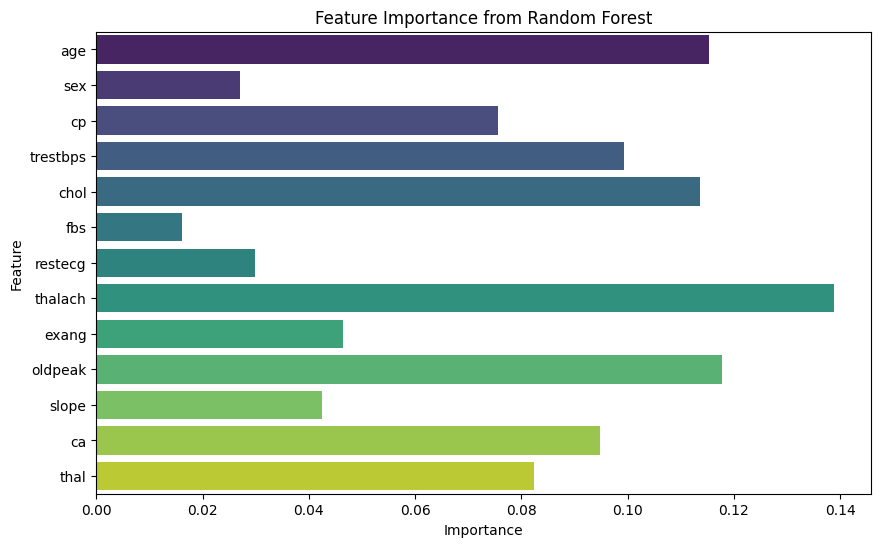

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Fit Random Forest on original data (not PCA)
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X, y)

# Get importance
importances = model_rf.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, hue=features, palette='viridis', legend=False)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create logistic regression model
lr = LogisticRegression(max_iter=1000)

# Apply RFE to select top 5 features
rfe = RFE(estimator=lr, n_features_to_select=5)
rfe.fit(X, y)

# Get selected features
selected_features_rfe = X.columns[rfe.support_]
print("Top 5 features selected by RFE:")
print(selected_features_rfe)


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Top 5 features selected by RFE:
Index(['sex', 'fbs', 'exang', 'slope', 'ca'], dtype='object')


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.feature_selection import SelectKBest, chi2


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled_positive = scaler.fit_transform(X)

# Apply Chi-Square
chi2_selector = SelectKBest(score_func=chi2, k=5)
chi2_selector.fit(X_scaled_positive, y)

# Get selected feature names
selected_features_chi2 = X.columns[chi2_selector.get_support()]
print("Top 5 features selected by Chi-Square Test:")
print(selected_features_chi2)


Top 5 features selected by Chi-Square Test:
Index(['exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')


In [58]:
from sklearn.model_selection import train_test_split

# Final selected features from previous step
selected_features = ['oldpeak', 'slope', 'ca', 'exang', 'thal', 'thalach']

X = df[selected_features]
y = df['target'].apply(lambda x: 1 if x > 0 else 0)  # Binary classification: 0 = no disease, 1 = disease

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


📌 Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.96      0.79      0.86        28

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60

AUC Score: 0.9475446428571429
--------------------------------------------------
📌 Decision Tree
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        32
           1       0.65      0.61      0.63        28

    accuracy                           0.67        60
   macro avg       0.67      0.66      0.66        60
weighted avg       0.67      0.67      0.67        60

AUC Score: 0.6506696428571428
--------------------------------------------------
📌 Random Forest
              precision    recall  f1-score   support

           0       0.77      0.84      0.81        32
           1       0.

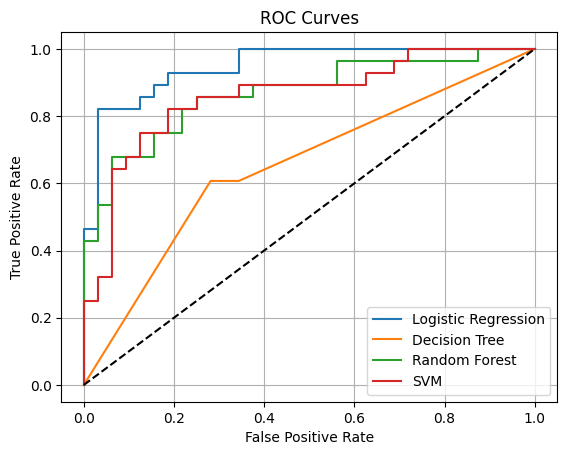

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"📌 {name}")
    print(classification_report(y_test, y_pred))
    print("AUC Score:", roc_auc_score(y_test, y_proba))
    print("-" * 50)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=name)

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

# Initialize model
lr = LogisticRegression()

# Apply GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Best parameters and score
print("✅ Best Logistic Regression Parameters:")
print(grid_search_lr.best_params_)
print("✅ Best Accuracy Score:", grid_search_lr.best_score_)


✅ Best Logistic Regression Parameters:
{'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
✅ Best Accuracy Score: 0.826418439716312


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
375 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.d

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_dist_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestClassifier()

# Apply RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf,
                                       n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

random_search_rf.fit(X_train, y_train)

# Print best results
print("✅ Best Random Forest Parameters:")
print(random_search_rf.best_params_)
print("✅ Best Accuracy Score:", random_search_rf.best_score_)


✅ Best Random Forest Parameters:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'bootstrap': False}
✅ Best Accuracy Score: 0.7969858156028369


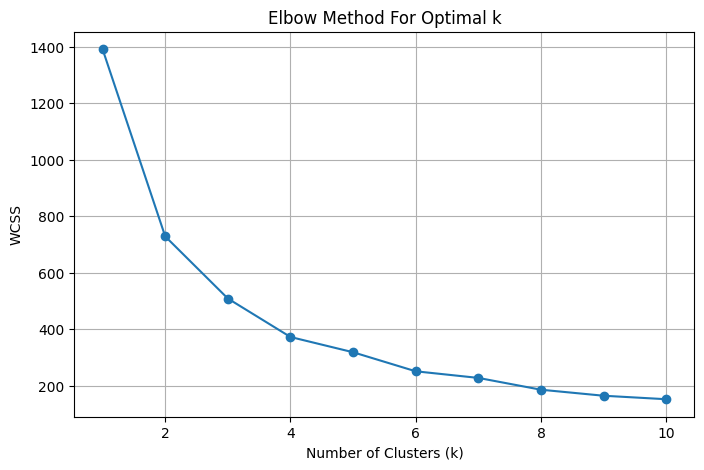

In [62]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try multiple k values to find the optimal number of clusters
wcss = []
X_pca_2d = pca_df.iloc[:, :2]  # First 2 PCA components

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_2d)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


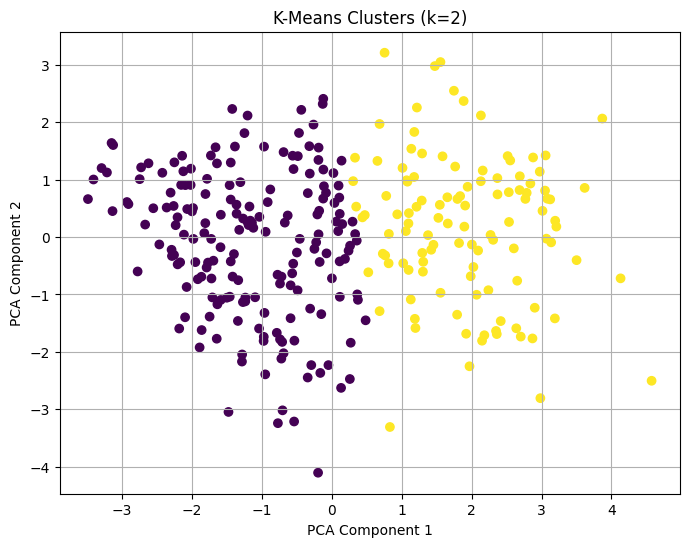

In [63]:
# Apply KMeans with optimal k
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca_2d)

# Add cluster labels to the dataframe
pca_df['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d.iloc[:, 0], X_pca_2d.iloc[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters (k=2)')
plt.grid(True)
plt.show()


In [64]:
selected_features = ['exang', 'oldpeak', 'slope', 'ca', 'thal']
X_selected = df[selected_features]


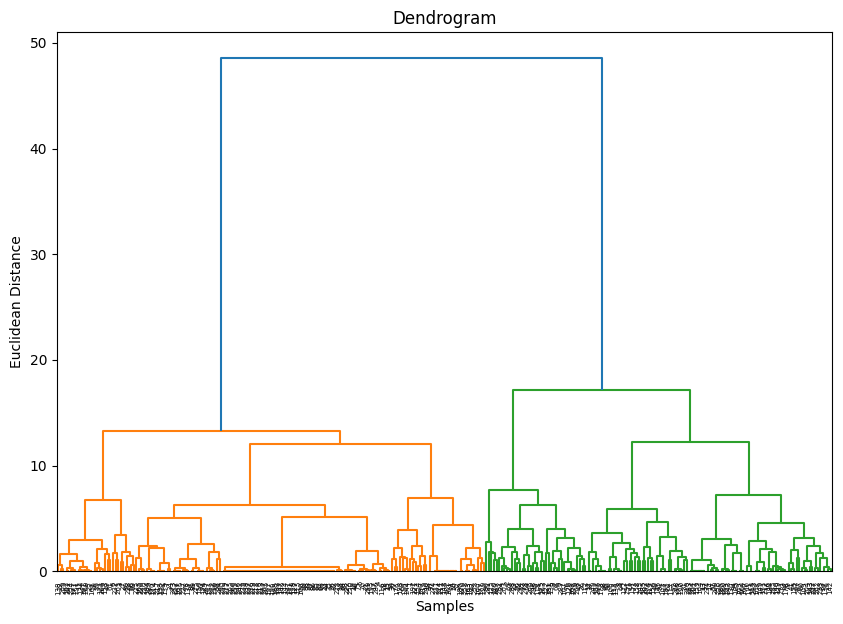

In [65]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_selected, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()


In [66]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_selected)


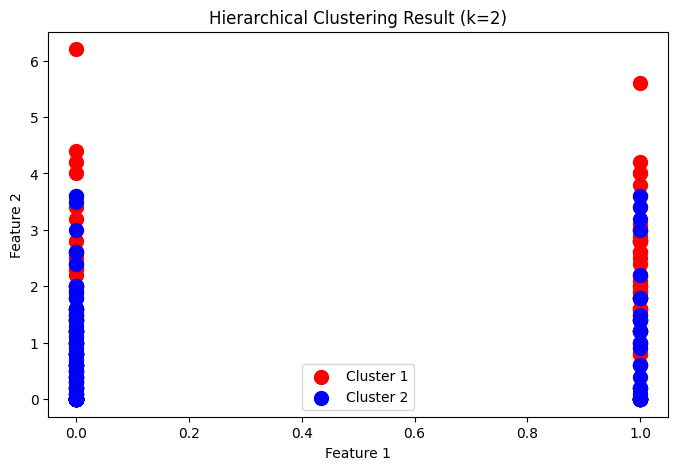

In [67]:
plt.figure(figsize=(8, 5))
plt.scatter(X_selected[y_hc == 0].iloc[:, 0], X_selected[y_hc == 0].iloc[:, 1], 
            s=100, c='red', label='Cluster 1')
plt.scatter(X_selected[y_hc == 1].iloc[:, 0], X_selected[y_hc == 1].iloc[:, 1], 
            s=100, c='blue', label='Cluster 2')
plt.title('Hierarchical Clustering Result (k=2)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


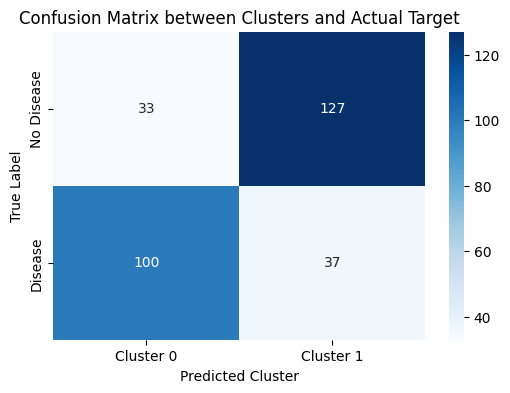

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert multiclass target to binary: 0 vs. not 0
y_true_binary = np.where(y == 0, 0, 1)

# confusion matrix
cm = confusion_matrix(y_true_binary, y_hc)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Cluster')
plt.ylabel('True Label')
plt.title('Confusion Matrix between Clusters and Actual Target')
plt.show()


In [69]:
df.to_csv('heart_disease.csv', index=False)


In [70]:
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [71]:
# import joblib

# joblib.dump(best_model, 'final_model.pkl')


In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"📌 {name}")
    print(classification_report(y_test, y_pred))
    print("AUC Score:", roc_auc_score(y_test, y_proba))
    print("-" * 50)


📌 Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.96      0.79      0.86        28

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60

AUC Score: 0.9475446428571429
--------------------------------------------------
📌 Decision Tree
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        32
           1       0.65      0.61      0.63        28

    accuracy                           0.67        60
   macro avg       0.67      0.66      0.66        60
weighted avg       0.67      0.67      0.67        60

AUC Score: 0.6506696428571428
--------------------------------------------------
📌 Random Forest
              precision    recall  f1-score   support

           0       0.77      0.84      0.81        32
           1       0.